## 自由時報爬蟲 (HTML)

In [3]:
import requests
res = requests.get('https://news.ltn.com.tw/list/breakingnews')

In [4]:
res

<Response [200]>

In [6]:
#res.text

In [7]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [17]:
for li in soup.select('ul.list li'):
    #print(li)
    title = li.select_one('.title').text
    link = li.select_one('a').get('href')
    dt = li.select_one('.time').text
    print(link, title, dt)
    #print('=======================')

https://news.ltn.com.tw/news/society/breakingnews/3329797 濁水溪床4天2野火 雲縣警消追查禍首 09:36
https://sports.ltn.com.tw/news/breakingnews/3329761 網球》力拚在位週數超越費爸成史上第一 喬帥坦言：這是目標 09:32
https://news.ltn.com.tw/news/life/breakingnews/3329789 苗縣降雨少 明德水庫「進帳掛零」 09:30
https://sports.ltn.com.tw/news/breakingnews/3329780 MLB》比賽中與貝茲情不自禁相擁 光芒小將透露背後故事 09:27
https://ec.ltn.com.tw/article/breakingnews/3329785 9月北美半導體設備出貨27.5億美元 年增逾4成創28個月新高  09:27
https://news.ltn.com.tw/news/world/breakingnews/3329782 美大選辯論》拜登：川普應對疫情根本悲劇 我才能帶領美國對抗 09:21
https://news.ltn.com.tw/news/world/breakingnews/3329779 美大選辯論》如何挺過下階段疫情？川普讚美國療程好 疫苗很快問世 09:20
https://3c.ltn.com.tw/news/42110 為了 iPhone 12、12 Pro 升級 5G 網路？果粉看法不一 09:20
https://news.ltn.com.tw/news/society/breakingnews/3329765 涉殺女友陳同佳洗錢罪出獄滿週年 何時來台仍未知 09:16
https://ec.ltn.com.tw/article/breakingnews/3329770 新台幣升值2.53角 來到28.65元 09:11
https://news.ltn.com.tw/news/life/breakingnews/3329757 「台灣最美馬桶」秘境爆紅 沙灘遊玩小心受困 09:09
https://ec.ltn.com.tw/article/breakingnews/3329752 美元轉強 黃金跌近25美元 09

In [18]:
newsary = []
for li in soup.select('ul.list li'):
    title = li.select_one('.title').text
    link = li.select_one('a').get('href')
    dt = li.select_one('.time').text
    newsary.append({'link':link, 'title':title, 'dt':dt})

In [19]:
newsary[0]

{'link': 'https://news.ltn.com.tw/news/society/breakingnews/3329797',
 'title': '濁水溪床4天2野火 雲縣警消追查禍首',
 'dt': '09:36'}

In [20]:
import pandas
newsdf = pandas.DataFrame(newsary)

In [21]:
newsdf.head()

,link,title,dt
0,https://news.ltn.com.tw/news/society/breakingn...,濁水溪床4天2野火 雲縣警消追查禍首,09:36
1,https://sports.ltn.com.tw/news/breakingnews/33...,網球》力拚在位週數超越費爸成史上第一 喬帥坦言：這是目標,09:32
2,https://news.ltn.com.tw/news/life/breakingnews...,苗縣降雨少 明德水庫「進帳掛零」,09:30
3,https://sports.ltn.com.tw/news/breakingnews/33...,MLB》比賽中與貝茲情不自禁相擁 光芒小將透露背後故事,09:27
4,https://ec.ltn.com.tw/article/breakingnews/332...,9月北美半導體設備出貨27.5億美元 年增逾4成創28個月新高,09:27


In [22]:
newsdf.to_excel('ltnnews.xlsx')

In [24]:
! open ltnnews.xlsx

## 自由時報爬蟲 (API) 

In [25]:
import requests
res = requests.get('https://news.ltn.com.tw/ajax/breakingnews/all/3')

In [32]:
import pandas
df = pandas.DataFrame(list(res.json()['data'].values()))
df.head()

,no,title,bigphoto_flag,photo_S,photo_L,url,time,type_en,group,type_cn,local,summary,video,localUrl,tagUrl,style,tagText
0,14799,挑戰出道最大尺度！徐睿知「倒奶、露腿根」火辣救全場,0,http://img.ltn.com.tw/Upload/style/page/2020/1...,http://img.ltn.com.tw/Upload/style/page/2020/1...,http://istyle.ltn.com.tw/article/14799,08:30,,istyle,,False,以《雖然是精神病但沒關係》一劇翻紅的韓國女星徐睿知，昨（22）日參加釜日電影節活動，以一身超...,0,,list/istyle/istyle,None,時尚
1,3329713,停駛17天破紀錄 《國際橋牌社》奇蹟登島拍攝,0,http://img.ltn.com.tw/Upload/ent/page/400S/202...,http://img.ltn.com.tw/Upload/ent/page/800S/202...,https://ent.ltn.com.tw/news/breakingnews/3329713,08:30,entertainment,breakingnews,娛樂,False,\n政治職人劇《國際橋牌社》第二季在馬祖開拍，21日劇組從馬祖南竿開拔到前線離島取景，還原1...,0,,list/breakingnews/entertainment,None,娛樂
2,3329733,瑞德西韋獲FDA正式授權 成美國唯一核准武肺治療藥物,1,http://img.ltn.com.tw/Upload/news/250/2020/10/...,http://img.ltn.com.tw/Upload/news/600/2020/10/...,https://news.ltn.com.tw/news/world/breakingnew...,08:28,world,breakingnews,國際,False,美國食品暨藥物管理局（FDA）22日批准吉立亞醫藥公司（Gilead Sciences）生產...,0,,list/breakingnews/world,None,國際
3,3329728,NBA》自認是球隊老大？ 歐尼爾建議該交易P.喬治,0,http://img.ltn.com.tw/Upload/sports/page/400S/...,http://img.ltn.com.tw/Upload/sports/page/800S/...,https://sports.ltn.com.tw/news/breakingnews/33...,08:16,sports,breakingnews,體育,False,\n洛杉磯快艇隊在去年網羅雷納德（Kawhi Leonard）、P.喬治（Paul Geor...,0,,list/breakingnews/sports,None,體育
4,3329741,日職》不忍了！還剩16場沒打 億元男洋砲慘遭戰力外,0,http://img.ltn.com.tw/Upload/sports/page/400S/...,http://img.ltn.com.tw/Upload/sports/page/800S/...,https://sports.ltn.com.tw/news/breakingnews/33...,08:15,sports,breakingnews,體育,False,\n阪神虎季前高薪簽來大聯盟洋砲鮑爾（Justin Bour），不過根據日媒報導，雖然球隊目...,0,,list/breakingnews/sports,None,體育


In [46]:
import requests
newsary = []
for i in range(1,6):
    res = requests.get('https://news.ltn.com.tw/ajax/breakingnews/all/{}'.format(i))
    data = res.json()['data']
    if isinstance(data, dict):
        newsary = newsary + list(res.json()['data'].values())
    else:
        newsary = newsary + res.json()['data']
import pandas
newsdf = pandas.DataFrame(newsary)
newsdf.head()

,no,title,bigphoto_flag,photo_S,photo_L,url,time,type_en,group,type_cn,local,summary,video,localUrl,tagUrl,style,tagText
0,3329820,秋遊玩樂攻略 新瓦屋稻草故事屋、討糖野餐趴邀大小朋友同樂,0,http://img.ltn.com.tw/Upload/news/250/2020/10/...,http://img.ltn.com.tw/Upload/news/600/2020/10/...,https://news.ltn.com.tw/news/life/breakingnews...,10:08,life,breakingnews,生活,新竹縣,［記者廖雪茹／新竹報導］秋風涼爽，新竹縣竹北市新瓦屋客家文化保存區本週六、日（24、25日）...,0,list/breakingnews/HsinchuCounty,list/breakingnews/life,None,生活
1,3329828,我駐美代表處1職員確診 暫停領務櫃檯服務,0,http://img.ltn.com.tw/Upload/news/250/2020/10/...,http://img.ltn.com.tw/Upload/news/600/2020/10/...,https://news.ltn.com.tw/news/politics/breaking...,10:08,politics,breakingnews,政治,False,外交部今證實，我駐美代表處一名職員22日確診武漢肺炎，外交部隨即為與該名職員有接觸史的其他職...,0,,list/breakingnews/politics,None,政治
2,3329834,台海軍情》101億採購BLOCK 1B方陣快砲 海軍：接裝儲存廠6月開工,1,http://img.ltn.com.tw/Upload/news/250/2020/10/...,http://img.ltn.com.tw/Upload/news/600/2020/10/...,https://news.ltn.com.tw/news/politics/breaking...,10:06,politics,breakingnews,政治,臺北市,軍方動支101億5936萬元，向美採購13套BLOCK 1B方陣快砲，以及執行8套現役方陣快...,0,list/breakingnews/Taipei,list/breakingnews/politics,None,政治
3,3329763,日職》阪神虎大砍兩老將 卻想留明年滿40歲的糸井嘉男,0,http://img.ltn.com.tw/Upload/sports/page/400S/...,http://img.ltn.com.tw/Upload/sports/page/800S/...,https://sports.ltn.com.tw/news/breakingnews/33...,10:05,sports,breakingnews,體育,False,\n阪神虎今年季後將不留老將福留孝介、能見篤史，藤川球兒將退休。明年將滿40歲的外野手糸井嘉...,0,,list/breakingnews/sports,None,體育
4,42107,中華電出招「48個月」綁 iPhone 12！官方解釋背後理由,0,http://img.ltn.com.tw/Upload/3c/page/2020/10/2...,http://img.ltn.com.tw/Upload/3c/page/2020/10/2...,http://3c.ltn.com.tw/news/42107,10:03,,3c,,False,因應首款 5G iPhone 今（23日）正式上市，中華電信罕見祭出 48 個月綁約購機和...,0,,list/3c/3c,None,3C


In [47]:
len(newsdf)

100

In [49]:
! git add Demo20201023.ipynb

In [50]:
! git commit -m "add Demo 20201023" Demo20201023.ipynb

[main 8992317] add Demo 20201023
 1 file changed, 755 insertions(+)
 create mode 100644 Demo20201023.ipynb


## Selenium

In [51]:
! pip install selenium

You should consider upgrading via the '/Users/davidchiu/.pyenv/versions/3.7.3/bin/python3.7 -m pip install --upgrade pip' command.


In [52]:
from selenium import webdriver
#driver = webdriver.Chrime('C://user//david//Downloads//chromedriver.exe')
driver = webdriver.Chrome('/opt/local/common/chromedriver')

In [53]:
driver.get('https://www.google.com')

In [54]:
driver.find_element_by_name('q')

<selenium.webdriver.remote.webelement.WebElement (session="eae4855e7da03592856f0f4eb1d49b19", element="0.2863608778332023-1")>

In [55]:
driver.find_element_by_name('qoo')

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"name","selector":"qoo"}
  (Session info: chrome=86.0.4240.111)
  (Driver info: chromedriver=2.42.591059 (a3d9684d10d61aa0c45f6723b327283be1ebaad8),platform=Mac OS X 10.14.6 x86_64)


In [56]:
driver.find_element_by_css_selector('input')

<selenium.webdriver.remote.webelement.WebElement (session="eae4855e7da03592856f0f4eb1d49b19", element="0.2863608778332023-2")>

In [57]:
driver.find_element_by_css_selector('input[name="q"]')

<selenium.webdriver.remote.webelement.WebElement (session="eae4855e7da03592856f0f4eb1d49b19", element="0.2863608778332023-1")>

In [58]:
driver.find_element_by_css_selector('input[name="q"]').send_keys('iphone12')

In [59]:
q = driver.find_element_by_css_selector('input[name="q"]')

In [60]:
q.send_keys('iphone 12')

In [61]:
from selenium.webdriver.common.keys import Keys
q.send_keys(Keys.RETURN)


In [62]:
driver.close()

### 完整搜尋Google 內容流程

In [63]:
from selenium import webdriver
driver = webdriver.Chrome('/opt/local/common/chromedriver')
# 連結網頁
driver.get('https://www.google.com')
# 定位元素
q = driver.find_element_by_css_selector('input[name="q"]')
# 送出資訊
q.send_keys('iphone 12')
q.send_keys(Keys.RETURN)

In [64]:
driver.get('https://www.google.com')
q = driver.find_element_by_css_selector('input[name="q"]')

In [66]:
q.send_keys('iphone 12')
q.submit()

In [67]:
a = driver.find_element_by_css_selector('a[data-click]')

In [69]:
# 點擊
a.click()

## 抓取網頁

In [70]:
# 連結網頁
driver.get('https://www.google.com')
# 定位元素
q = driver.find_element_by_css_selector('input[name="q"]')
# 送出資訊
q.send_keys('iphone 12')
q.send_keys(Keys.RETURN)

In [72]:
#driver.page_source

In [73]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'lxml')

In [77]:
for rec in soup.select('br+ :nth-child(2) span'):
    print(rec.text)

台灣大哥大i12 指定專案$0起 - 開賣首3日申辦抽宏佳騰智慧電車
全新 iPhone 12 - Apple 官方網站
iPhone 12系列 現貨熱賣 - PChome24h購物
【9453享分期】哀鳳12 月付945元 - 不需信用卡 憑身分證輕鬆分期
iPhone 12 與iPhone 12 mini - Apple (台灣)
全新選擇iPhone 12 Pro 機型。 - Apple
購買iPhone 12 與iPhone 12 mini - Apple (台灣)
iPhone 12頭香姐上週六就來家人助陣輪班| iPhone 12開賣 ...
iPhone 12開賣資深果粉4年內3度搶到直營店頭香 - 聯合新聞網
熱騰騰的iPhone 12 Pro 到手光速開箱分享- 第1頁- Apple討論區 ...
藍色其實很時尚！iPhone 12與12 Pro外觀開箱介紹- SOGI手機王
iPhone 12 Pro (256G) - PChome 24h購物
傑昇通信-挑戰手機市場最低價 - iPhone超低破盤價


In [78]:
driver.close()

### 練習題
請使用 Selenium 讓瀏覽器自動點開蘋果網頁 https://www.apple.com/tw/

In [79]:
from selenium import webdriver
driver = webdriver.Chrome('/opt/local/common/chromedriver')
driver.get('https://www.apple.com/tw/shop/buy-iphone/iphone-12-pro')

In [84]:
item1 = driver.find_element_by_css_selector('#Item1')

In [85]:
item1.click()

In [88]:
blue = driver.find_element_by_css_selector('#Item2pacificblue_label .ir')

In [89]:
blue.click()

In [90]:
psize = driver.find_element_by_css_selector('#Item3128gb_label .form-selector-title')

In [91]:
psize.click()

In [94]:
driver.find_element_by_css_selector('.as-purchaseinfo-section').click()

In [95]:
driver.close()

### 自動選購流程 

In [102]:
from selenium import webdriver
import time 
driver = webdriver.Chrome('/opt/local/common/chromedriver')
driver.get('https://www.apple.com/tw/shop/buy-iphone/iphone-12-pro')
driver.implicitly_wait(3)
time.sleep(1)
item1 = driver.find_element_by_css_selector('#Item1')
item1.click()
time.sleep(1)
blue = driver.find_element_by_css_selector('#Item2pacificblue_label .ir')
blue.click()
time.sleep(1)
psize = driver.find_element_by_css_selector('#Item3128gb_label .form-selector-title')
psize.click()
time.sleep(1)
#driver.find_element_by_css_selector('.as-purchaseinfo-section').click()

In [97]:
driver.close()

In [103]:
psize.location

{'x': 652, 'y': 1056}

In [104]:
psize.size

{'height': 29, 'width': 81}

## 橘色涮涮鍋

### 開啟瀏覽器

In [317]:
from selenium import webdriver

driver = webdriver.Chrome('/opt/local/common/chromedriver')
driver.get('https://inline.app/booking/-LL7w1Y0HNb5dvdA1v7N:inline-live-2a466?language=zh-tw')
#driver.get('https://inline.app/booking/-LWPd0adgxVuykwvUplY:inline-live-2a466/-LWPdrkAaF7Us4AWR4au?language=zh-tw')

### 選擇人數 (下拉式選單)

In [318]:
from selenium.webdriver.support.ui import Select
s1 = Select(driver.find_element_by_id('adult-picker'))  
s1.select_by_value("3") 

### 點選日期

In [319]:
driver.find_element_by_css_selector('#date-picker').click()

In [325]:
dt = driver.find_element_by_css_selector('button[data-date="2020-11-21"]')
dt.click()

In [326]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'lxml')

In [328]:
for ele in soup.select('#book-now-branch-list button'):
    if '11:45' in  ele.get('aria-label'):
        #print(ele.get('aria-label'))
        findlabel = driver.find_element_by_css_selector('button[aria-label="{}"]'.format(ele.get('aria-label')))
        time.sleep(1)
        findlabel.click()
        break

In [329]:
driver.find_element_by_id('name').send_keys('QOO')

In [330]:
driver.find_element_by_id('phone').send_keys('0912345678')

In [331]:

box = driver.find_element_by_css_selector('label[for="privacy-policy"]') #.click()
box.click()

## 包裝成定位小幫手

In [299]:

from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup

def bookResturant(url):
    driver = webdriver.Chrome('/opt/local/common/chromedriver')
    driver.get(url)
    time.sleep(3)
    s1 = Select(driver.find_element_by_id('adult-picker'))  
    s1.select_by_value("3") 
    time.sleep(3)
    driver.execute_script("window.scrollTo(0, 500);")
    time.sleep(3)
    driver.find_element_by_css_selector('#date-picker').click()
    
    dt = driver.find_element_by_css_selector('button[data-date="2020-11-23"]')
    dt.click()
    driver.execute_script("window.scrollTo(5, 800);")
    soup = BeautifulSoup(driver.page_source, 'lxml')
    for ele in soup.select('#book-now-branch-list button'):
        if '11:45' in  ele.get('aria-label'):
            #print(ele.get('aria-label'))
            findlabel = driver.find_element_by_css_selector('button[aria-label="{}"]'.format(ele.get('aria-label')))
            time.sleep(1)
            findlabel.click()
            break
    time.sleep(3)
    driver.find_element_by_id('name').send_keys('QOO')
    driver.find_element_by_id('phone').send_keys('0912345678')    
    box = driver.find_element_by_css_selector('label[for="privacy-policy"]') #.click()
    box.click()
    time.sleep(3)
    driver.close()

In [300]:
bookResturant('https://inline.app/booking/-LWPd0adgxVuykwvUplY:inline-live-2a466/-LWPdrkAaF7Us4AWR4au?language=zh-tw')

WebDriverException: Message: unknown error: Element is not clickable at point (378, 869)
  (Session info: chrome=86.0.4240.111)
  (Driver info: chromedriver=2.42.591059 (a3d9684d10d61aa0c45f6723b327283be1ebaad8),platform=Mac OS X 10.14.6 x86_64)


In [213]:
from selenium import webdriver
import time
driver = webdriver.Chrome('/opt/local/common/chromedriver')
driver.implicitly_wait(3)
driver.get('https://inline.app/booking/-LL7w1Y0HNb5dvdA1v7N:inline-live-2a466?language=zh-tw')
time.sleep(5)
driver.execute_script("window.scrollTo(0, 500);")
time.sleep(1)


In [214]:
driver.get('https://inline.app/booking/-LL7w1Y0HNb5dvdA1v7N:inline-live-2a466?language=zh-tw')
time.sleep(5)
driver.execute_script("window.scrollTo(0, 500);")
time.sleep(1)


In [222]:
dp = driver.find_element_by_css_selector('#adult-picker')
dp.click()
time.sleep(1)

adult = driver.find_element_by_css_selector('#adult-picker > option["value=3"]')
adult.click()

InvalidSelectorException: Message: invalid selector: An invalid or illegal selector was specified
  (Session info: chrome=86.0.4240.111)
  (Driver info: chromedriver=2.42.591059 (a3d9684d10d61aa0c45f6723b327283be1ebaad8),platform=Mac OS X 10.14.6 x86_64)


In [218]:

adult = driver.find_element_by_css_selector('option["value=3"]')
adult.click()

InvalidSelectorException: Message: invalid selector: An invalid or illegal selector was specified
  (Session info: chrome=86.0.4240.111)
  (Driver info: chromedriver=2.42.591059 (a3d9684d10d61aa0c45f6723b327283be1ebaad8),platform=Mac OS X 10.14.6 x86_64)


## 自由時報爬蟲

In [177]:
from selenium import webdriver
driver = webdriver.Chrome('/opt/local/common/chromedriver')
driver.get('https://news.ltn.com.tw/list/breakingnews')

In [178]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'lxml')

In [180]:
for t in soup.select('.title'):
    print(t.text)

強國養魚法！抓來近1年不餵養 鯰魚竟餓成「蝌蚪」
日月潭湖光山色為舞台  舞躍水沙連25日登場
孩子總是坐不住是過動? 職能治療師：注意孩子3現象
NBA》快艇新教頭泰倫魯 有信心留住雷納德、P.喬治
台海軍情》叫板「天龍演習」？解放軍海南軍演  發射數十枚空對空飛彈
國軍製投誠食品赫見「恆春仁壽派出所」 居民直呼：母湯！
在野黨合作擋萊豬遭否決 蔣萬安嗆：國人會牢記這一刻
9色iPhone 12直擊！「金色」驚艷更勝「太平洋藍」 「塑膠藍」洗冤屈
未停妥公車就開車門致老翁摔出車外受傷  司機遭起訴
MLB》洋基有望迎接「Didi」鳳還巢！ 但有最大競爭者
美大選辯論》川普逼問：誰建造關移民的籠子？ 拜登避答
南韓流感疫苗接種已32死 是否繼續施打專家意見分歧
蔡英文暗批中國 不該用政治力量阻台參與WHO
議員送柯文哲衛生紙 諷幫中央擦屁股
公費流感疫苗不足「誤判」？ 北市聯醫璩大成：為政者難處
台灣口罩紅到國外 最強星二代也搶戴！
iPhone 12、12 Pro 全 9 種顏色直擊！實機這 3 款有驚喜
3個月大後沒見過媽 剛成年就被告要生活費
北市改口停辦跨年晚會不含境外確診遭轟 柯文哲坦言有錯會改
美大選辯論》川普、拜登最終對決  六大議題交鋒


In [181]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [182]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'lxml')
for t in soup.select('.title'):
    print(t.text)

強國養魚法！抓來近1年不餵養 鯰魚竟餓成「蝌蚪」
日月潭湖光山色為舞台  舞躍水沙連25日登場
孩子總是坐不住是過動? 職能治療師：注意孩子3現象
NBA》快艇新教頭泰倫魯 有信心留住雷納德、P.喬治
台海軍情》叫板「天龍演習」？解放軍海南軍演  發射數十枚空對空飛彈
國軍製投誠食品赫見「恆春仁壽派出所」 居民直呼：母湯！
在野黨合作擋萊豬遭否決 蔣萬安嗆：國人會牢記這一刻
9色iPhone 12直擊！「金色」驚艷更勝「太平洋藍」 「塑膠藍」洗冤屈
未停妥公車就開車門致老翁摔出車外受傷  司機遭起訴
MLB》洋基有望迎接「Didi」鳳還巢！ 但有最大競爭者
美大選辯論》川普逼問：誰建造關移民的籠子？ 拜登避答
南韓流感疫苗接種已32死 是否繼續施打專家意見分歧
蔡英文暗批中國 不該用政治力量阻台參與WHO
議員送柯文哲衛生紙 諷幫中央擦屁股
公費流感疫苗不足「誤判」？ 北市聯醫璩大成：為政者難處
台灣口罩紅到國外 最強星二代也搶戴！
iPhone 12、12 Pro 全 9 種顏色直擊！實機這 3 款有驚喜
3個月大後沒見過媽 剛成年就被告要生活費
北市改口停辦跨年晚會不含境外確診遭轟 柯文哲坦言有錯會改
美大選辯論》川普、拜登最終對決  六大議題交鋒
深澳漁港千萬海釣船起火  船員機警以滅火器15分鐘滅火
新北交通罰單爆量 侯友宜：檢舉達人太多
韋恩的食農生活》嬰幼兒用塑膠奶瓶，可能喝下100萬顆微塑膠？！
女騎士自撞轎車昏迷 路人CPR救回一命
MLB》聯盟親兒子？防守數據被林多海放、柯瑞亞竟入圍金手套
難忍富二代男友太花心    美腿女神狠斬1年情
否認對納瓦尼下毒 普廷：我下令讓他能夠出國治療
怕騎士被掉落纜線勾到  員警路口冒雨持桿撐半小時
上百萬元恐撞飛！路口不禮讓 「海神」瑪莎拉蒂與豐田車相撞
高發會提出「壯世代」 盼社會不要對熟齡者標籤化
藍營扯美豬和總統大選有關 陳時中：根本兩回事
蘋果 iPhone 12 超受果粉歡迎！電信業估：有機會破蘋果歷史紀錄
疫情改變辦公模式？調查：全球「永久」在家上班人數明年將增加1倍
日職》中日龍王牌大野雄大 以前輩陳偉殷的速球為目標
健保費將漲幾成？ 陳時中：還在討論中
新北多元都更案核准率僅58％ 侯友宜：加速溝通效率
「緊緊緊」來賞鳥 破百隻黑面琵鷺現身茄萣、永安濕地
2020台灣公共行政聯合年會 黃偉哲：城巿

In [185]:
from selenium import webdriver
from bs4 import BeautifulSoup
options = webdriver.ChromeOptions()
options.add_argument('--headless')  
driver=webdriver.Chrome('/opt/local/common/chromedriver', chrome_options=options)
driver.get('https://news.ltn.com.tw/list/breakingnews')

soup = BeautifulSoup(driver.page_source, 'lxml')
for t in soup.select('.title'):
    print(t.text)
    
    
driver.save_screenshot('ltn.png')

/Users/davidchiu/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


高雄湖內夜市違規販售醫用口罩 攤商被罰3萬元
隆宸翰酗酒怒吼童星  洩金曲歌后私下育兒經
新北市長官邸都更招商年底公告 未來將有高階職務宿舍
拚學習歷程檔案竟要記過、補習  中市議員批太超過
美國制裁奏效！華為Q3營收大幅放緩、僅成長3.7％
國民黨號召民眾上街反美豬 陳吉仲：尊重
打造特色公園 竹縣府赴北北宜取經
限量2萬盒！明天來搶超商「牛仔玫瑰粉」口罩  比丹寧款更美
已經燒了2737億...三菱重工擬停止開發噴氣式客機
前美副國務卿：中國和平崛起變「戰狼外交」 會輸得很慘
強國養魚法！抓來近1年不餵養 鯰魚竟餓成「蝌蚪」
日月潭湖光山色為舞台  舞躍水沙連25日登場
孩子總是坐不住是過動? 職能治療師：注意孩子3現象
NBA》快艇新教頭泰倫魯 有信心留住雷納德、P.喬治
台海軍情》叫板「天龍演習」？解放軍海南軍演  發射數十枚空對空飛彈
國軍製投誠食品赫見「恆春仁壽派出所」 居民直呼：母湯！
在野黨合作擋萊豬遭否決 蔣萬安嗆：國人會牢記這一刻
9色iPhone 12直擊！「金色」驚艷更勝「太平洋藍」 「塑膠藍」洗冤屈
未停妥公車就開車門致老翁摔出車外受傷  司機遭起訴
MLB》洋基有望迎接「Didi」鳳還巢！ 但有最大競爭者


True

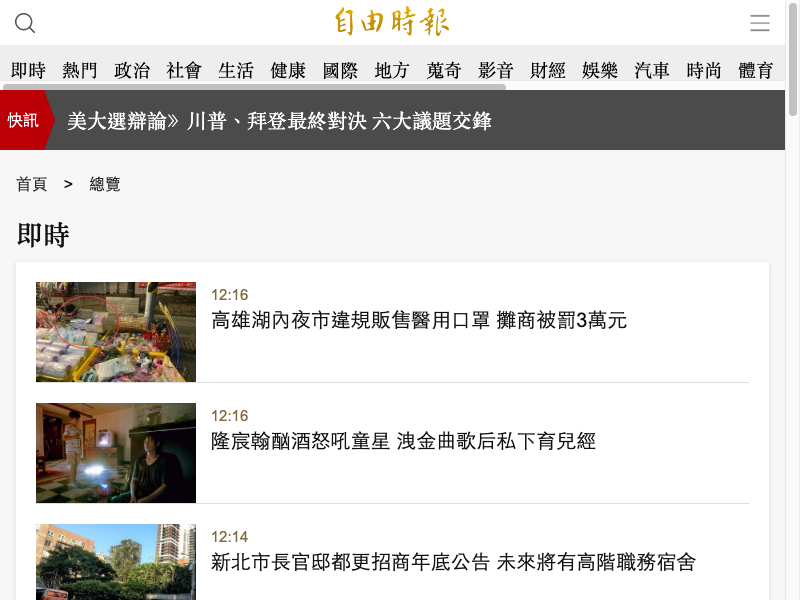

In [186]:
from PIL import Image
Image.open('ltn.png')

In [187]:
from selenium import webdriver
from bs4 import BeautifulSoup
options = webdriver.ChromeOptions()
#options.add_argument('--headless')  
driver=webdriver.Chrome('/opt/local/common/chromedriver', chrome_options=options)
driver.get('https://news.ltn.com.tw/list/breakingnews')

soup = BeautifulSoup(driver.page_source, 'lxml')
for t in soup.select('.title'):
    print(t.text)
    
    
driver.save_screenshot('ltn.png')

/Users/davidchiu/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


高雄湖內夜市違規販售醫用口罩 攤商被罰3萬元
隆宸翰酗酒怒吼童星  洩金曲歌后私下育兒經
新北市長官邸都更招商年底公告 未來將有高階職務宿舍
拚學習歷程檔案竟要記過、補習  中市議員批太超過
美國制裁奏效！華為Q3營收大幅放緩、僅成長3.7％
國民黨號召民眾上街反美豬 陳吉仲：尊重
打造特色公園 竹縣府赴北北宜取經
限量2萬盒！明天來搶超商「牛仔玫瑰粉」口罩  比丹寧款更美
已經燒了2737億...三菱重工擬停止開發噴氣式客機
前美副國務卿：中國和平崛起變「戰狼外交」 會輸得很慘
強國養魚法！抓來近1年不餵養 鯰魚竟餓成「蝌蚪」
日月潭湖光山色為舞台  舞躍水沙連25日登場
孩子總是坐不住是過動? 職能治療師：注意孩子3現象
NBA》快艇新教頭泰倫魯 有信心留住雷納德、P.喬治
台海軍情》叫板「天龍演習」？解放軍海南軍演  發射數十枚空對空飛彈
國軍製投誠食品赫見「恆春仁壽派出所」 居民直呼：母湯！
在野黨合作擋萊豬遭否決 蔣萬安嗆：國人會牢記這一刻
9色iPhone 12直擊！「金色」驚艷更勝「太平洋藍」 「塑膠藍」洗冤屈
未停妥公車就開車門致老翁摔出車外受傷  司機遭起訴
MLB》洋基有望迎接「Didi」鳳還巢！ 但有最大競爭者


True

In [206]:
im = driver.find_element_by_css_selector('img.lazy_imgs_ltn')

In [207]:
im.location

{'x': 35, 'y': 282}

In [208]:
im.size

{'height': 120, 'width': 160}

In [209]:
driver.save_screenshot('ltn2.png')

True

In [210]:
from PIL import Image
im2 = Image.open('ltn2.png')

In [211]:
left = im.location["x"]
top = im.location["y"]
right = im.location["x"] + im.size["width"]
bottom = im.location["y"] + im.size["height"]
im2 = Image.open('ltn2.png')
im3 = im2.crop((left, top, right, bottom))

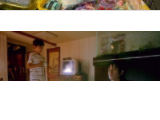

In [212]:
im3

## Appium

## PTT

In [333]:
import requests
res = requests.get('https://www.ptt.cc/bbs/MobileComm/index.html')
#res.text

In [335]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [336]:
soup.select('.title a')

[<a href="/bbs/MobileComm/M.1603426544.A.AAE.html">[閒聊] 感覺12有魔改上pro的潛力</a>,
 <a href="/bbs/MobileComm/M.1603426626.A.F32.html">[問題] 亞太收訊手機影響</a>,
 <a href="/bbs/MobileComm/M.1603428096.A.A5C.html">Re: [問題] Pixel5螢幕邊緣觸控反應較慢？</a>,
 <a href="/bbs/MobileComm/M.1603428932.A.6C3.html">[討論] iphone 12/pro vs iphone 11 pro vs s20+</a>,
 <a href="/bbs/MobileComm/M.1603429775.A.1D2.html">[心得] 注意台哥大合約綁Myvideo/music</a>,
 <a href="/bbs/MobileComm/M.1603430705.A.D46.html">Re: [新聞] 中華電出招「48個月」綁 iPhone 12！官</a>,
 <a href="/bbs/MobileComm/M.1603432738.A.145.html">Re: [閒聊] 去台哥大門市被店員弄到想跳槽</a>,
 <a href="/bbs/MobileComm/M.1603433024.A.4A6.html">[閒聊] Desire 20 +</a>,
 <a href="/bbs/MobileComm/M.1603433971.A.951.html">Re: [新聞] 中華電出招「48個月」綁 iPhone 12！官</a>,
 <a href="/bbs/MobileComm/M.1591369281.A.9AD.html">[公告] MobileComm板規 20200605版</a>,
 <a href="/bbs/MobileComm/M.1601912245.A.E24.html">[公告] 置底閒聊區3.0 </a>]

In [337]:
import requests
res = requests.get('https://www.ptt.cc/bbs/Gossiping/index.html')
#res.text

In [339]:
#res.text

In [341]:
import requests
cookies = {
   'over18': '1' 
}
res = requests.get('https://www.ptt.cc/bbs/Gossiping/index.html', cookies = cookies)
#res.text

In [343]:
#res.text

## 財報狗

In [ ]:
ginenec655@ptcji.com
1qaz2wsx

In [346]:
import requests
headers = {
  'cookie': 'buuid=TmZscVgzU0pWajM2cmowUmhsbmgvcG5pSEUrVnFhWG0vcUx5WElGay9zRTRiSjlhbUhNeFZFcml0YUVOb3Naby0tUnZxUkpETHIwbFNsQmtoNTlBMWF6Zz09--99e2029dc132338262765f469d21500037b7074a; easy_ab=c8aec8b6-2e1f-4894-b9b5-c15c5575d540; _ga=GA1.2.1347110091.1603435171; _gid=GA1.2.1906018800.1603435171; upgrade_browser=1; intercom-id-d5wdetwg=336321ec-9ba4-45bc-a6e3-4067af48c34f; remember_user_token=W1s1OTkxMTZdLCIkMmEkMTAkTFNMRXdyVjJBUHhLTVNYaTdudmJhTyIsIjE2MDM0MzUzMjguOTk3ODA1OCJd--6194d15e5658cd7972df3e45a84177f186a3fc32; _gat=1; intercom-session-d5wdetwg=L3ZsWmtuYVJrMlVHcG9Vb0JIQ2N3TjRMWEZ4TmJlYTZNc0hNQ0VwdDFVMUxXQ05WdkN5MGlYZUJ6TFozcGRpNy0tWS9WNUQ4UVppTS80bERqcFlTV28rUT09--142260f8232b580ea268cb9c2936579bb4fdf77c; _statementdog_session_v2=eWUxSE1kNm9UUVc3R1ZwSHZXdzF3ZEJUNHl0WnAwcDh2UUxreW9NSDRSRlo1b1RlYXJNT1p2bHJ3dFl2bXNTSmRCL2NKMkRnZUdrYUp3ek1JeG14WlZlaTN6Ty9UWVEraXAvYWtpeDZQdDdwclQwcS9HdmpOeFB0Q0JEYmRHUWlvQUdOVVd1MUxvbXRVbVJ1ejFzV2Y0NW9DUisveEYxL3N6ZWdpU01lRGNHRkVieWVEYVoraGJ5UmdQcHliclhGNExQV1JuSG5sN1JiUUZuSjRGYmNzUy9oMkcwK2ZhZkExUFdvZWN4ZWF1SnJGVGZTREV2aVRpVGttMXIvTWVOenZtUmYrcy8zNUdVcUEwbTRWaTVQd3kzcWc4dmNQdGkxLzZxcFlnbzRxRmU2N2U5d3VwTE5jaytaQS9DVnNZOFhyUnMyRUc3akY4Szg3dC81MGhFSnV3PT0tLWxXekJJTnpGQnRaWXFvMVBKMXNLd0E9PQ%3D%3D--47ff26ee6b3a5e6043318fe49394d00ae1b267b8; amplitude_id_0ab77a441fbc226251ef1a272380fcd7statementdog.com=eyJkZXZpY2VJZCI6IjkzNjhmYjU4LTliMDEtNGM5NS1iNmVlLTRkMDFhNDE2NWM0MFIiLCJ1c2VySWQiOiI1OTkxMTYiLCJvcHRPdXQiOmZhbHNlLCJzZXNzaW9uSWQiOjE2MDM0MzUxNzEyMjMsImxhc3RFdmVudFRpbWUiOjE2MDM0MzUzOTYzNzksImV2ZW50SWQiOjksImlkZW50aWZ5SWQiOjEwLCJzZXF1ZW5jZU51bWJlciI6MTl9'  
}
res = requests.get('https://statementdog.com/api/v1/feeds?&_=1603435397004', headers = headers)
#res.json()

In [348]:
import requests
from bs4 import BeautifulSoup
url = 'https://statementdog.com/users/sign_in'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'lxml')

In [352]:
token = soup.select_one('meta[name="csrf-token"]').get('content')

In [ ]:
payload = {
'utf8': '✓',
'authenticity_token': token,
'user[email]': 'ginenec655@ptcji.com',
'user[password]': '1qaz2wsx',
'user[remember_me]': '1'    
}
requests.post(url = url, data = payload)

In [353]:
import requests
from bs4 import BeautifulSoup
url = 'https://statementdog.com/users/sign_in'
rs = requests.session()

# get token
res = rs.get(url)
soup = BeautifulSoup(res.text, 'lxml')
token = soup.select_one('meta[name="csrf-token"]').get('content')

payload = {
'utf8': '✓',
'authenticity_token': token,
'user[email]': 'ginenec655@ptcji.com',
'user[password]': '1qaz2wsx',
'user[remember_me]': '1'    
}
# signin
res2 = rs.post(url = url, data = payload)

In [354]:
res3 = rs.get('https://statementdog.com/api/v1/feeds?&_=1603435397004')

In [356]:
#res3.json()

### 串接 Selenium 與 requests

In [358]:
from selenium import webdriver
driver = webdriver.Chrome('/opt/local/common/chromedriver')
driver.get('https://statementdog.com/users/sign_in')

In [360]:
driver.find_element_by_id('user_email').send_keys('ginenec655@ptcji.com')

In [361]:
driver.find_element_by_id('user_password').send_keys('1qaz2wsx')

In [362]:
driver.find_element_by_css_selector('button.submit-btn').click()

In [364]:
cary = []
for c in driver.get_cookies():
    cary.append('{}={}'.format(c.get('name'), c.get('value')))

In [367]:
headers = {'Cookie':';'.join(cary)}

In [369]:
res = requests.get('https://statementdog.com/api/v1/feeds?&_=1603435397004', headers = headers)
#res.json()

## 高鐵範例

In [370]:
import requests
url = 'https://www.thsrc.com.tw/TimeTable/Search'
payload = {'SearchType': 'S', 'Lang': 'TW', 
           'StartStation': 'TaiPei', 
           'EndStation': 'XinZhu', 
           'OutWardSearchDate': '2020/10/23', 
           'OutWardSearchTime': '17:00', 
           'ReturnSearchDate': '2020/10/23', 'ReturnSearchTime': '15:00'}
res = requests.post(url, data = payload)

In [372]:
#res.json()

## 自由時報

In [373]:
import requests
res = requests.get('https://news.ltn.com.tw/list/breakingnews')

In [375]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')


In [379]:
for rec in soup.select('.lazy_imgs_ltn'):
    print(rec.get('data-src'))

https://img.ltn.com.tw/Upload/news/250/2020/10/23/3330203_2_1.jpg
https://img.ltn.com.tw/Upload/sports/page/400S/2020/10/23/phpC050tv.jpg
https://img.ltn.com.tw/Upload/business/page/400S/2020/10/23/php1FxGDW.jpg
https://img.ltn.com.tw/Upload/news/250/2020/10/23/3330188_1_1.jpg
https://img.ltn.com.tw/Upload/news/250/2020/10/23/3330191_4_1.jpg
https://img.ltn.com.tw/Upload/sports/page/400S/2020/10/23/phpd64dvF.jpg
https://img.ltn.com.tw/Upload/sports/page/400S/2020/10/23/phpddaYiC.jpg
https://img.ltn.com.tw/Upload/business/page/400S/2020/10/23/3330202_1.jpg
https://img.ltn.com.tw/Upload/news/250/2020/10/23/3330174_1_1.jpg
https://img.ltn.com.tw/Upload/news/250/2020/10/23/phpX1Igsc.jpg
https://img.ltn.com.tw/Upload/3c/page/2020/10/23/300x200/201023-42112-1.png
https://img.ltn.com.tw/Upload/business/page/400S/2020/10/23/3330197_1.jpg
https://img.ltn.com.tw/Upload/ent/page/400S/2020/10/23/3330198_1.jpg
https://img.ltn.com.tw/Upload/news/250/2020/10/23/phpYCYCxH.jpg
https://img.ltn.com.tw/Up

<img alt="百萬Youtuber「放火」女子家過夜  遭強拍裸照勒索25萬" class="lazy_imgs_ltn" src="https://img.ltn.com.tw/Upload/news/250/2020/10/23/3330203_2_1.jpg" title="百萬Youtuber「放火」女子家過夜  遭強拍裸照勒索25萬"/>

In [380]:
with open('1.jpg', 'wb') as f:
    res = requests.get('https://img.ltn.com.tw/Upload/news/250/2020/10/23/3330203_2_1.jpg')
    f.write(res.content)

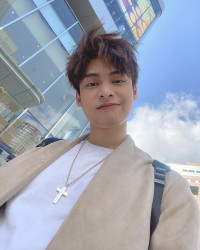

In [381]:
from PIL import Image
Image.open('1.jpg')

In [384]:
for rec in soup.select('.lazy_imgs_ltn'):
    url = rec.get('data-src')
    fname = url.split('/')[-1]
    with open(fname, 'wb') as f:
        res = requests.get(url)
        f.write(res.content)

In [385]:
! open . 

## 中華電信預購方案
- https://www.cht.com.tw/home/apple/iphone/index

In [387]:
import requests
res = requests.get('https://www.cht.com.tw/home/apple/iphone/index')
#res.text

<table>
    <thead>
        <tr><th>c1</th><th>c2</th></tr>
    </thead>
    <tbody>
        <tr><td>v1</td><td>v2</td></tr>
        <tr><td>v1</td><td>v2</td></tr>
        <tr><td>v1</td><td>v2</td></tr>
        <tr><td>v1</td><td>v2</td></tr>
        <tr><td>v1</td><td>v2</td></tr>
    </tbody>
</table>

In [388]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [393]:
ary = []
for tr in soup.select('tr'):
    dataary = []
    th = tr.select('th')
    if th:
        for data in th:
            dataary.append(data.text)
    td = tr.select('td')
    if td:
        for data in td:
            dataary.append(data.text)
    ary.append(dataary)


In [395]:
#ary

In [396]:
import pandas
dfs = pandas.read_html('https://www.cht.com.tw/home/apple/iphone/index')

In [398]:
df = dfs[0]

In [402]:
df['month'] = df['月繳金額.1'].str.extract('(\d+)個月')

In [404]:
df['month'].ffill(inplace=True)

In [407]:
df2 = df[~df['月繳金額.1'].str.contains('個月')]

In [409]:
df2.dropna(inplace=True)

/Users/davidchiu/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [411]:
df2.columns

Index(['月繳金額', '月繳金額.1', '月繳金額.2', '$599', '$799', '$999', '$1199', '$1,399',
       '$1,599', '$1,799', '$2,699', 'month'],
      dtype='object')

In [413]:
df2.columns = ['優惠價', '機型', '容量', '$599', '$799', '$999', '$1199', '$1,399',
       '$1,599', '$1,799', '$2,699', 'month']

In [414]:
df2.head()

,優惠價,機型,容量,$599,$799,$999,$1199,"$1,399","$1,599","$1,799","$2,699",month
2,購機優惠價(元),iPhone 12,64GB,-,-,13300,10800,0,0,0,0,48
3,購機優惠價(元),iPhone 12,128GB,-,-,14900,12400,0,0,0,0,48
4,購機優惠價(元),iPhone 12,256GB,-,-,18400,15900,4400,2400,400,0,48
6,購機優惠價(元),iPhone 12 Pro,128GB,-,-,20300,17800,6300,4300,2300,0,48
7,購機優惠價(元),iPhone 12 Pro,256GB,-,-,23800,21300,9800,7800,5800,0,48


In [417]:
df3 = pandas.wide_to_long(df2, ['$'], i=['優惠價','機型', '容量',  'month'], j= 'price', suffix = '[\d,]+')

In [418]:
df3.reset_index(inplace=True)

In [419]:
df3.head()

,優惠價,機型,容量,month,price,$
0,購機優惠價(元),iPhone 12,64GB,48,599,-
1,購機優惠價(元),iPhone 12,64GB,48,799,-
2,購機優惠價(元),iPhone 12,64GB,48,999,13300
3,購機優惠價(元),iPhone 12,64GB,48,1199,10800
4,購機優惠價(元),iPhone 12,64GB,48,"1,399",0


In [421]:
df4 = df3[df3['$'] != '-']

In [422]:
df4.head()

,優惠價,機型,容量,month,price,$
2,購機優惠價(元),iPhone 12,64GB,48,999,13300
3,購機優惠價(元),iPhone 12,64GB,48,1199,10800
4,購機優惠價(元),iPhone 12,64GB,48,"1,399",0
5,購機優惠價(元),iPhone 12,64GB,48,"1,599",0
6,購機優惠價(元),iPhone 12,64GB,48,"1,799",0


In [423]:
df4['month'] = df4['month'].astype(int)

/Users/davidchiu/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [424]:
df4['price'] = df4['price'].map(lambda e: int(e.replace(',','')))

/Users/davidchiu/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [425]:
df4['$'] = df4['$'].astype(int)

/Users/davidchiu/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [426]:
df4.head()

,優惠價,機型,容量,month,price,$
2,購機優惠價(元),iPhone 12,64GB,48,999,13300
3,購機優惠價(元),iPhone 12,64GB,48,1199,10800
4,購機優惠價(元),iPhone 12,64GB,48,1399,0
5,購機優惠價(元),iPhone 12,64GB,48,1599,0
6,購機優惠價(元),iPhone 12,64GB,48,1799,0


In [427]:
df4['total_price'] = df4['month'] * df4['price'] + df4['$']

/Users/davidchiu/.pyenv/versions/3.7.3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [429]:
df4.sort_values('total_price')

,優惠價,機型,容量,month,price,$,total_price
144,購機優惠價(元),iPhone 12,64GB,24,599,22300,36676
152,購機優惠價(元),iPhone 12,128GB,24,599,23900,38276
96,購機優惠價(元),iPhone 12,64GB,30,599,21300,39270
145,購機優惠價(元),iPhone 12,64GB,24,799,21300,40476
104,購機優惠價(元),iPhone 12,128GB,30,599,22900,40870
...,...,...,...,...,...,...,...
7,購機優惠價(元),iPhone 12,64GB,48,2699,0,129552
31,購機優惠價(元),iPhone 12 Pro,128GB,48,2699,0,129552
39,購機優惠價(元),iPhone 12 Pro,256GB,48,2699,0,129552
15,購機優惠價(元),iPhone 12,128GB,48,2699,0,129552
